# Algorithm
Gait Cycle -> Remove Outlier Patterns -> Clean Gait Cycle

In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

In [2]:
import pickle

# Saving the objects:
# with open('gait_cycle_dataset_knee.pkl', 'wb') as f:  
#     pickle.dump(gait_cycle_dataset, f)

# gait_cycle_dataset_knee_hip_all_firstfiltered - gait_cycle_dataset_mediapipe
# Getting back the objects:
with open('gait_cycle_dataset_knee.pkl', 'rb') as f:  
    gait_cycle_dataset = pickle.load(f)
print(gait_cycle_dataset.shape)
gait_cycle_dataset.head(2)

(1033, 8)


file target_class   direction leg_side step_no  \
0  016_NM_01_results           NM  left2right        r       0   
1  016_NM_01_results           NM  left2right        r       1   

                                              data_k  \
0  [15.363278965010693, 17.627590032662823, 20.08...   
1  [10.275082716983746, 12.283868431155497, 15.63...   

                                    poses2d_filtered  \
0  [[[327.82599487304685, 529.4435180664062], [32...   
1  [[[966.4197265625, 515.9251647949219], [962.83...   

                                    poses3d_filtered  
0  [[[0.0, 0.0, 0.0], [-0.006222020834684372, 0.0...  
1  [[[0.0, 0.0, 0.0], [-0.010303234308958053, 0.0...

In [3]:
print(gait_cycle_dataset.shape)
print(gait_cycle_dataset['target_class'].value_counts())

# there is no enough data sample so probably incorrect data (less than THR)
THR = 20
gait_cycle_dataset = gait_cycle_dataset[gait_cycle_dataset['data_k'].apply(lambda x:len(x)>THR)]
print(gait_cycle_dataset.shape)
print(gait_cycle_dataset['target_class'].value_counts())

# gait_cycle_dataset = gait_cycle_dataset[((gait_cycle_dataset['leg_side']=='r')&(gait_cycle_dataset['direction']=='left2right'))|
#                                         ((gait_cycle_dataset['leg_side']=='l')&(gait_cycle_dataset['direction']=='right2left'))]
print(gait_cycle_dataset.shape)
print(gait_cycle_dataset['target_class'].value_counts())

(1033, 8)
target_class
SV    297
MD    278
NM    266
EL    192
Name: count, dtype: int64
(1027, 8)
target_class
SV    295
MD    278
NM    263
EL    191
Name: count, dtype: int64
(1027, 8)
target_class
SV    295
MD    278
NM    263
EL    191
Name: count, dtype: int64


In [4]:
def check_experiments_value_counts(ds):
    vals_dict = {'NM':30, 'EL':15, 'MD':20, 'SV': 15}

    for vals_dict_select,v in vals_dict.items():
        print(vals_dict_select)
        file_names_list = sorted(ds[ds['target_class']==vals_dict_select]['file'].unique())
        vals = [int(file_name[:3])-1 for i, file_name in enumerate(file_names_list)]
        ress = []
        for i in range(vals_dict[vals_dict_select]):
            if vals.count(i)<2:
                print(i+1, '- exist:', [ii for ii in file_names_list if int(ii[:3])-1==i])
            else:
                ress.append('ok')
        print('ok count: ', len(ress))

check_experiments_value_counts(gait_cycle_dataset)

NM
15 - exist: ['015_NM_01_results']
ok count:  29
EL
ok count:  15
MD
ok count:  20
SV
ok count:  15


In [5]:
# gait_cycle_dataset['data_kf'] = gait_cycle_dataset['data_k'].apply(lambda x:resample_gc(x))
gait_cycle_dataset['data_kf'] = gait_cycle_dataset['data_k'].apply(lambda x:signal.resample(x, 101))
gait_cycle_dataset.head(2)

file target_class   direction leg_side step_no  \
0  016_NM_01_results           NM  left2right        r       0   
1  016_NM_01_results           NM  left2right        r       1   

                                              data_k  \
0  [15.363278965010693, 17.627590032662823, 20.08...   
1  [10.275082716983746, 12.283868431155497, 15.63...   

                                    poses2d_filtered  \
0  [[[327.82599487304685, 529.4435180664062], [32...   
1  [[[966.4197265625, 515.9251647949219], [962.83...   

                                    poses3d_filtered  \
0  [[[0.0, 0.0, 0.0], [-0.006222020834684372, 0.0...   
1  [[[0.0, 0.0, 0.0], [-0.010303234308958053, 0.0...   

                                             data_kf  
0  [15.363278965010693, 16.45546677924989, 17.127...  
1  [10.275082716983754, 9.673763474518484, 10.613...

target_class
SV    295
MD    278
NM    263
EL    191
Name: count, dtype: int64


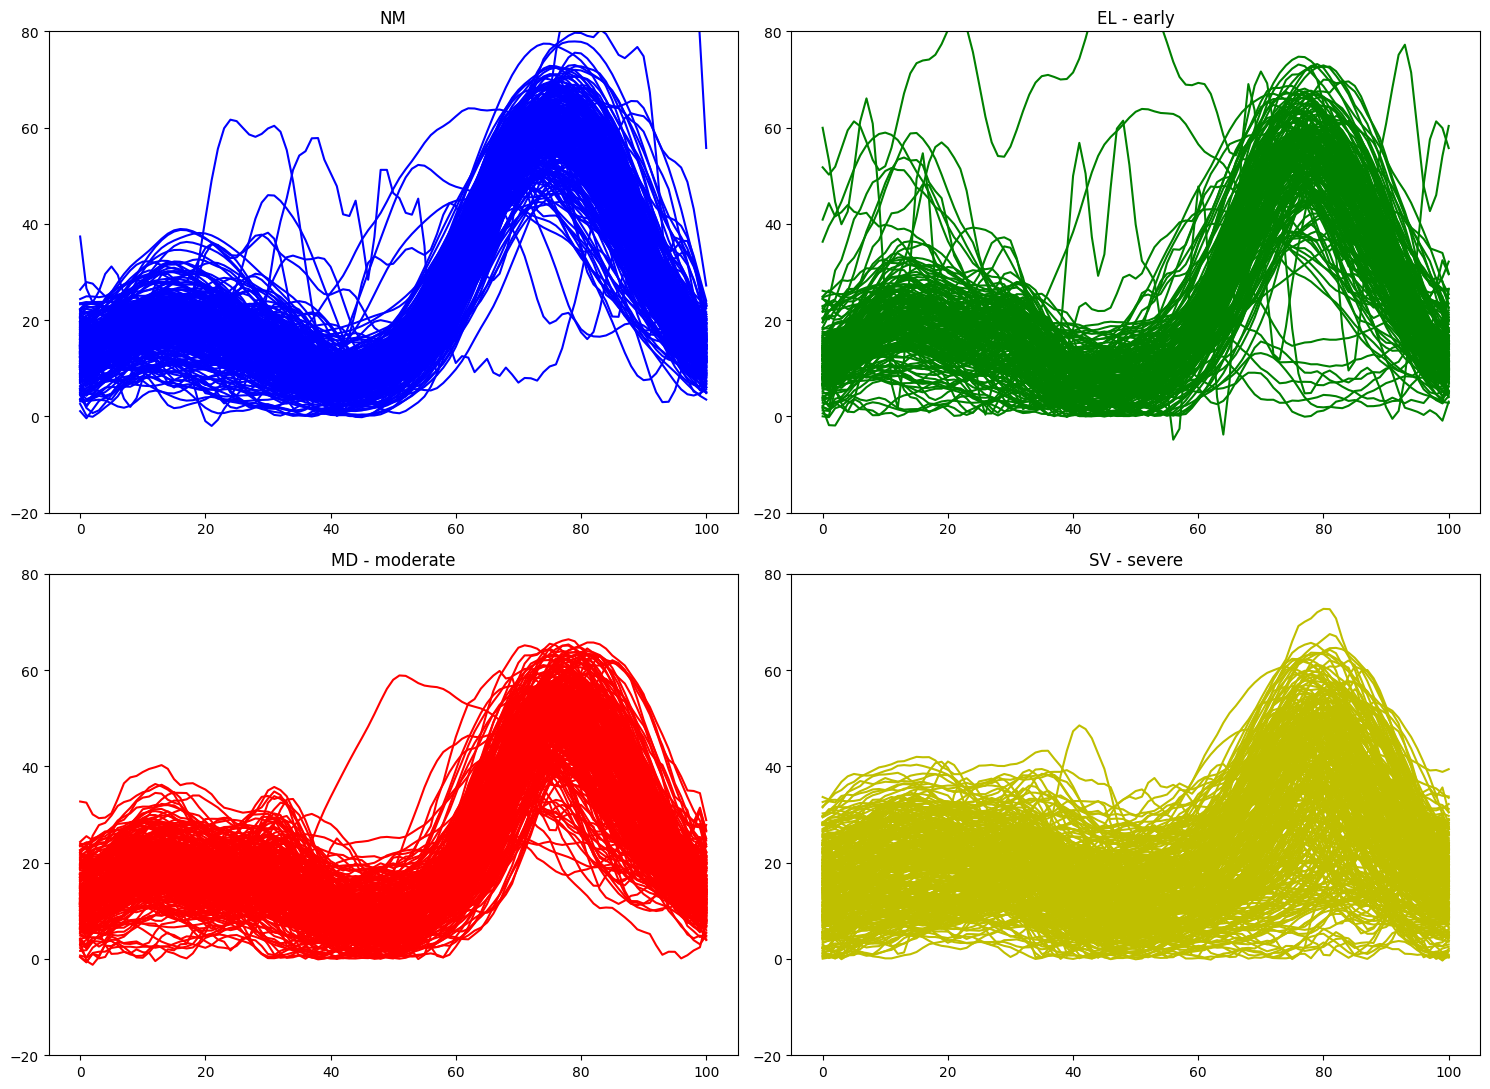

In [6]:
sub_data = gait_cycle_dataset.copy()
# sub_data = [(gait_cycle_dataset['leg_side'].isin(['l', 'r']))&(gait_cycle_dataset['direction'].isin(['left2right', 'right2left']))]
sub_data.shape
print(sub_data['target_class'].value_counts())

d_joint = 'data_kf' # 'data_k', 'data_h'

fig_list = {'NM':[0, "b"],
            'EL':[1, "g"],
            'MD':[2, "r"],
            'SV':[3, "y"]}
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
ax = ax.flatten()

for _, d in sub_data.iterrows():
    if len(d[d_joint])>0:
        i, c = fig_list[d['target_class']]
        # ax[i].plot(resample_gc(d[d_joint]), c)
        ax[i].plot(d[d_joint], c)


ax[0].set_title('NM')
ax[1].set_title('EL - early')
ax[2].set_title('MD - moderate')
ax[3].set_title('SV - severe')
for i in range(4):
    ax[i].set_ylim([-20, 80])
plt.tight_layout()
plt.show()

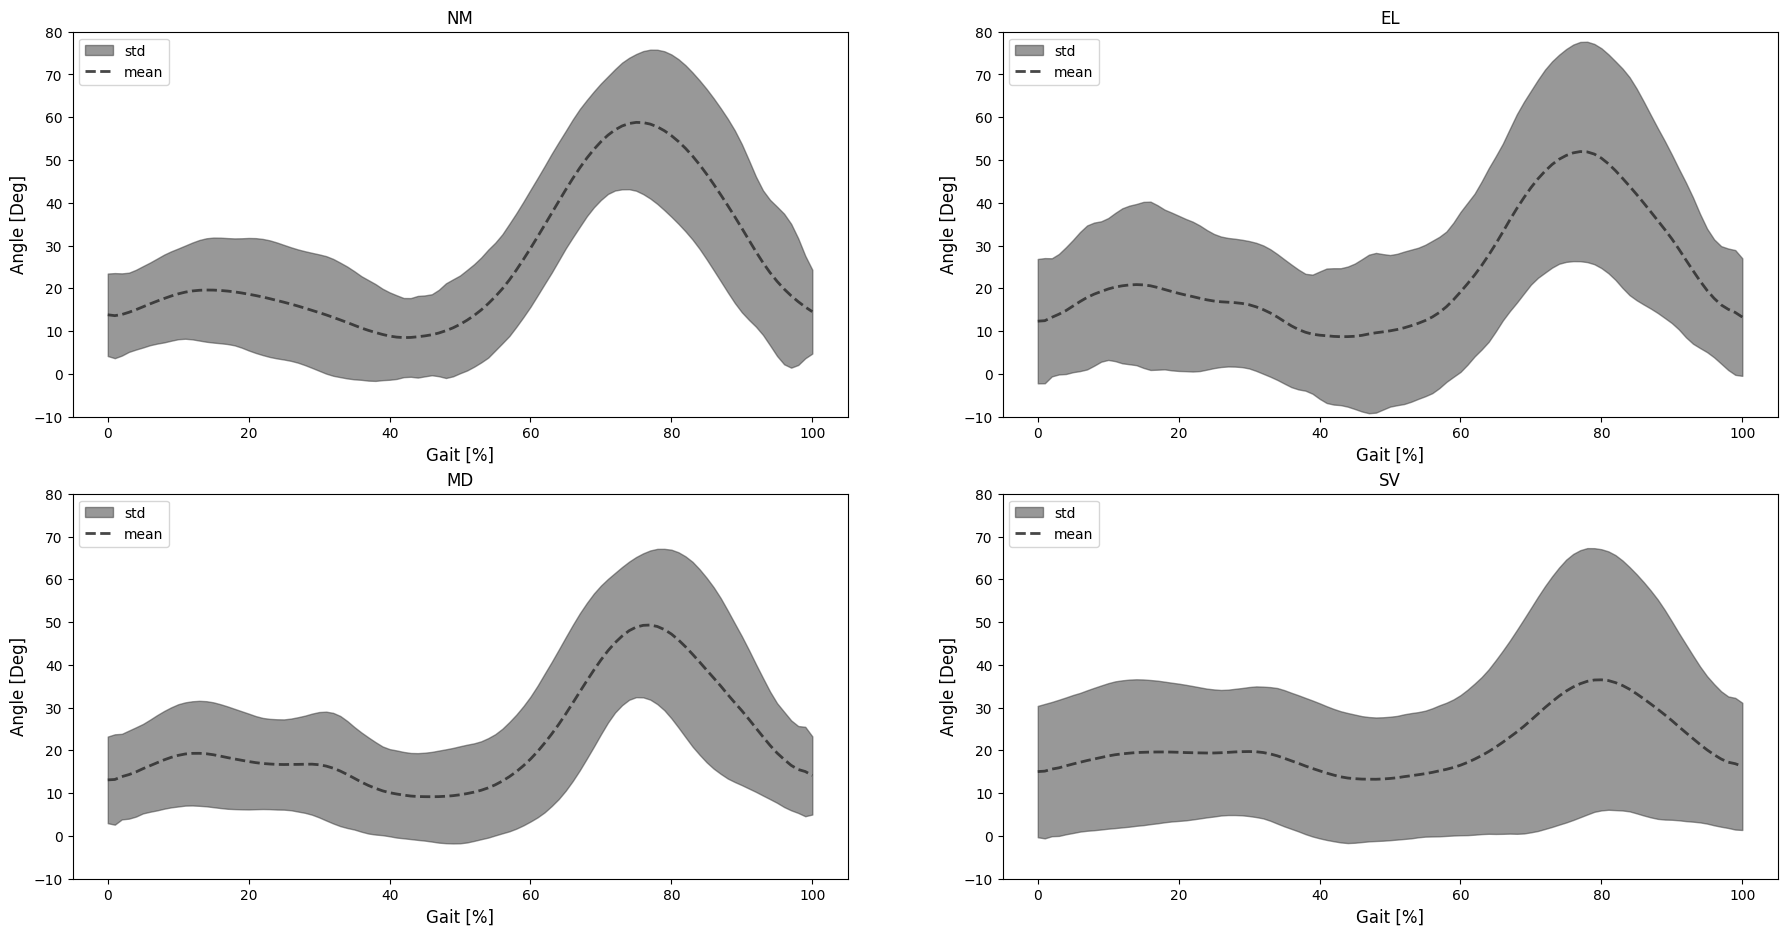

In [65]:
# data_to_plot = {}
# direction_list = ['right2left', 'left2right']
# target_class_list = ['NM', 'EL', 'MD', 'SV']
# col = 'data_kf'

# for tgt_cls in target_class_list:
#   data_to_plot_sub = {}
#   for drct in direction_list:
#     p = gait_cycle_dataset[(gait_cycle_dataset['direction']==drct)&(gait_cycle_dataset['target_class']==tgt_cls)][col]
#     data_in_df = pd.DataFrame([i for i in p.values], index=p.index)

#     data_to_plot_sub[drct] = {'data':data_in_df, 'mean':data_in_df.mean(axis=0), 'std':data_in_df.std(axis=0)}

#   data_to_plot[tgt_cls] = data_to_plot_sub

# data_to_plot = {}
# direction_list = ['all']
# target_class_list = ['NM', 'EL', 'MD', 'SV']
# col = 'data_kf'

# for tgt_cls in target_class_list:
#   data_to_plot_sub = {}
#   for drct in direction_list:
#     p = gait_cycle_dataset[(gait_cycle_dataset['target_class']==tgt_cls)][col]
#     data_in_df = pd.DataFrame([i for i in p.values], index=p.index)

#     data_to_plot_sub[drct] = {'data':data_in_df, 'mean':data_in_df.mean(axis=0), 'std':data_in_df.std(axis=0)}

#   data_to_plot[tgt_cls] = data_to_plot_sub

data_to_plot = {}
target_class_list = ['NM', 'EL', 'MD', 'SV']
col = 'data_kf'

for tgt_cls in target_class_list:
  p = gait_cycle_dataset[(gait_cycle_dataset['target_class']==tgt_cls)][col]
  data_in_df = pd.DataFrame([i for i in p.values], index=p.index)
  data_to_plot[tgt_cls] = {'data':data_in_df, 'mean':data_in_df.mean(axis=0), 'std':data_in_df.std(axis=0)}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 11))
axes = axes.flatten()
for ax, tgt_cls in zip(axes, target_class_list):
    standard_deviations = 2
    smooth_path = data_to_plot[tgt_cls]['mean']
    path_deviation = data_to_plot[tgt_cls]['std']
    under_line = (smooth_path - standard_deviations * path_deviation)
    over_line = (smooth_path + standard_deviations * path_deviation)

    ax.fill_between(path_deviation.index, under_line, over_line, color=(0.20, 0.20, 0.20), alpha=.5) #std curves.
    p1 = ax.plot(path_deviation.index, smooth_path, color=(0.20, 0.20, 0.20), linestyle='--', linewidth=2, alpha=.9) #mean curve.
    # p2 = ax.fill(np.NaN, np.NaN, color=(0.20, 0.20, 0.20), alpha=.9)


    # ax.set_title(jnt+'-'+exp)
    ax.set_ylabel('Angle [Deg]', fontsize=12)
    ax.set_xlabel('Gait [%]', fontsize=12)

    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(True)
    # ax.spines['left'].set_visible(True)

    ax.set_ylim([-10, 80])
    ax.set_title(tgt_cls)
    ax.legend(['std', 'mean'], title=False, fontsize=10, loc='upper left')

# pad = 5 # in points
# for ax, row in zip(axes, target_class_list):
#   ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
#               xycoords=ax.yaxis.label, textcoords='offset points',
#               size='large', ha='right', va='center', weight='bold')

# fig.tight_layout()

In [34]:
# fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(6, 6))
# for i, tgt_cls in enumerate(target_class_list):
#   for j, drct in enumerate(direction_list):

#     ax = axes[i]

#     standard_deviations = 2
#     smooth_path = data_to_plot[tgt_cls][drct]['mean']
#     path_deviation = data_to_plot[tgt_cls][drct]['std']
#     under_line = (smooth_path - standard_deviations * path_deviation)
#     over_line = (smooth_path + standard_deviations * path_deviation)

#     ax.fill_between(path_deviation.index, under_line, over_line, color=(0.20, 0.20, 0.20), alpha=.9) #std curves.
#     p1 = ax.plot(path_deviation.index, smooth_path, color=(0.20, 0.20, 0.20), linestyle='--', linewidth=2, alpha=.9) #mean curve.
#     p2 = ax.fill(np.NaN, np.NaN, color=(0.20, 0.20, 0.20), alpha=.9)


#     # ax.set_title(jnt+'-'+exp)
#     ax.set_ylabel('Angle [Deg]', fontsize=12)
#     ax.set_xlabel('Gait [%]', fontsize=12)

#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(True)
#     ax.spines['left'].set_visible(True)

#     ax.set_ylim([-10, 80])

# exp_list_title = direction_list
# jnt_list_title = target_class_list

# pad = 5 # in points
# for ax, col in zip(axes, exp_list_title):
#   ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
#               xycoords='axes fraction', textcoords='offset points',
#               size='large', ha='center', va='baseline', weight='bold')

# for ax, row in zip(axes, jnt_list_title):
#   ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
#               xycoords=ax.yaxis.label, textcoords='offset points',
#               size='large', ha='right', va='center', weight='bold')

# fig.tight_layout()

In [29]:
# fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(8, 10))
# for i, tgt_cls in enumerate(target_class_list):

#     ax = axes[i]

#     standard_deviations = 1
#     smooth_path = data_to_plot[tgt_cls][direction_list[0]]['mean']
#     path_deviation = data_to_plot[tgt_cls][direction_list[0]]['std']
#     under_line = (smooth_path - standard_deviations * path_deviation)
#     over_line = (smooth_path + standard_deviations * path_deviation)

#     smooth_path1 = data_to_plot[tgt_cls][direction_list[1]]['mean']
#     path_deviation1 = data_to_plot[tgt_cls][direction_list[1]]['std']
#     under_line1 = (smooth_path1 - standard_deviations * path_deviation1)
#     over_line1 = (smooth_path1 + standard_deviations * path_deviation1)

#     ax.fill_between(path_deviation.index, under_line, over_line, color=(0.20, 0.20, 0.20), alpha=.9) #std curves.
#     p1 = ax.plot(path_deviation.index, smooth_path, color=(0.20, 0.20, 0.20), linestyle='--', linewidth=2, alpha=.9) #mean curve.
#     p2 = ax.fill(np.NaN, np.NaN, color=(0.20, 0.20, 0.20), alpha=.9)

#     ax.fill_between(path_deviation1.index, under_line1, over_line1, color=(0.78, 0.78, 0.78), alpha=.5) #std curves.
#     p3 = ax.plot(path_deviation1.index, smooth_path1, color=(0.78, 0.78, 0.78), linestyle='-', linewidth=2, alpha=.5) #mean curve.
#     p4 = ax.fill(np.NaN, np.NaN, color=(0.78, 0.78, 0.78), alpha=.5)


#     # ax.set_title(jnt+'-'+exp)
#     ax.set_ylabel('Angle [Deg]', fontsize=12)
#     ax.set_xlabel('Gait [%]', fontsize=12)

#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(True)
#     ax.spines['left'].set_visible(True)

#     # ax.legend(['True', 'Prediction'])
#     ax.legend([(p2[0], p1[0]), (p4[0], p3[0])], direction_list)
#     ax.set_ylim([-10, 80])

# jnt_list_title = target_class_list
# pad = 5 # in points
# for ax, row in zip(axes, jnt_list_title):
#   ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
#               xycoords=ax.yaxis.label, textcoords='offset points',
#               size='large', ha='right', va='center', weight='bold')

# fig.tight_layout()

In [10]:
# tgt_cls = 'NM'
# drct = 'right2left'
# sub_data1 = data_to_plot[tgt_cls][drct]

# sub_data1_data = sub_data1['data']
# path_deviation = 2
# sub_data1_upper = sub_data1['mean']+path_deviation*sub_data1['std']
# sub_data1_lower = sub_data1['mean']-path_deviation*sub_data1['std']

# selected_idx = sub_data1_data[((sub_data1_data>sub_data1_lower)&(sub_data1_data<sub_data1_upper)).all(axis=1)].index
# for i in sub_data1_data.index:
#     if i in selected_idx:
#         plt.plot(sub_data1['data'].loc[i], 'g')
#     else:
#         plt.plot(sub_data1['data'].loc[i], 'r', alpha=0.3)

# plt.plot(sub_data1_upper, 'b*')
# plt.plot(sub_data1_lower, 'b*')

In [32]:
# selected_data = pd.DataFrame(columns=['target_class','data_kf', 'file'])
selected_data = gait_cycle_dataset.copy()
selected_data['hasOutlier'] = True

path_deviation = 2
for _, tgt_cls in enumerate(target_class_list):
  sub_data1 = data_to_plot[tgt_cls]

  sub_data1_data = sub_data1['data']
  path_deviation = 2
  sub_data1_upper = sub_data1['mean']+path_deviation*sub_data1['std']
  sub_data1_lower = sub_data1['mean']-path_deviation*sub_data1['std']

  selected_idx = sub_data1_data[((sub_data1_data>sub_data1_lower)&(sub_data1_data<sub_data1_upper)).all(axis=1)].index
  selected_data.loc[selected_idx, 'hasOutlier'] = False

print(selected_data.shape)
print(selected_data[~selected_data['hasOutlier']].shape)
selected_data.head(2)

(1027, 10)
(725, 10)


file target_class   direction leg_side step_no  \
0  016_NM_01_results           NM  left2right        r       0   
1  016_NM_01_results           NM  left2right        r       1   

                                              data_k  \
0  [15.363278965010693, 17.627590032662823, 20.08...   
1  [10.275082716983746, 12.283868431155497, 15.63...   

                                    poses2d_filtered  \
0  [[[327.82599487304685, 529.4435180664062], [32...   
1  [[[966.4197265625, 515.9251647949219], [962.83...   

                                    poses3d_filtered  \
0  [[[0.0, 0.0, 0.0], [-0.006222020834684372, 0.0...   
1  [[[0.0, 0.0, 0.0], [-0.010303234308958053, 0.0...   

                                             data_kf  hasOutlier  
0  [15.363278965010693, 16.45546677924989, 17.127...       False  
1  [10.275082716983754, 9.673763474518484, 10.613...       False

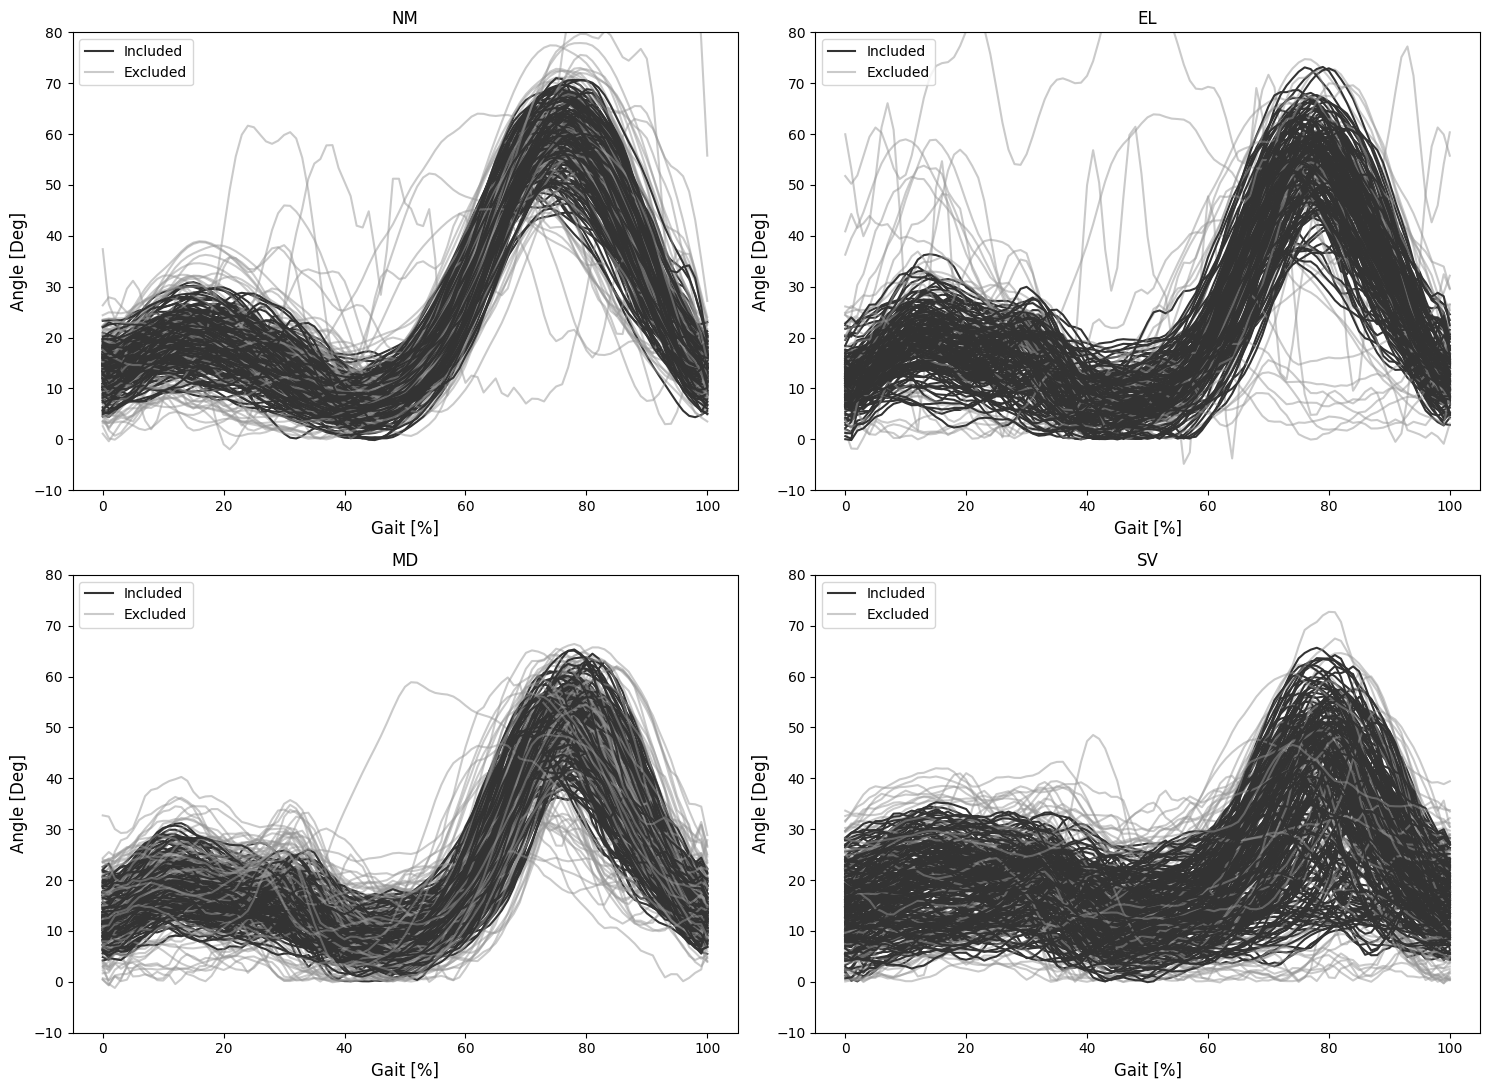

In [61]:
d_joint = 'data_kf' # 'data_k', 'data_h'

fig_list = {'NM':[0, "b"],
            'EL':[1, "g"],
            'MD':[2, "r"],
            'SV':[3, "y"]}
fig_list_legend_check = {'NM':[False, False],
                        'EL':[False, False],
                        'MD':[False, False],
                        'SV':[False, False]}
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
ax = ax.flatten()

label_is_ok = np.array([False, False]*4)
for _, d in selected_data.iterrows():
    if not d['hasOutlier']:
        i, c = fig_list[d['target_class']]
        # ax[i].plot(d[d_joint], color=(0.20, 0.20, 0.20), label='X')
        if fig_list_legend_check[d['target_class']][0]:
            ax[i].plot(d[d_joint], color=(0.20, 0.20, 0.20))
        else:
            ax[i].plot(d[d_joint], color=(0.20, 0.20, 0.20), label='Included')
            fig_list_legend_check[d['target_class']][0] = True
    else:
        i, c = fig_list[d['target_class']]
        # ax[i].plot(d[d_joint], color=(0.20, 0.20, 0.20), alpha=0.3, label='Excluded')
        if fig_list_legend_check[d['target_class']][1]:
            ax[i].plot(d[d_joint], color=(0.59, 0.59, 0.59), alpha=0.5)
        else:
            ax[i].plot(d[d_joint], color=(0.59, 0.59, 0.59), alpha=0.5, label='Excluded')
            fig_list_legend_check[d['target_class']][1] = True

ax[0].set_title('NM')
ax[1].set_title('EL')
ax[2].set_title('MD')
ax[3].set_title('SV')
for i in range(4):
    ax[i].set_ylim([-10, 80])
    ax[i].set_ylabel('Angle [Deg]', fontsize=12)
    ax[i].set_xlabel('Gait [%]', fontsize=12)
    # ax[i].legend(['included', 'excluded'])
    ax[i].legend(title=False, fontsize=10, loc='upper left')

plt.tight_layout()
plt.show()

target_class
SV    222
NM    177
MD    172
EL    154
Name: count, dtype: int64


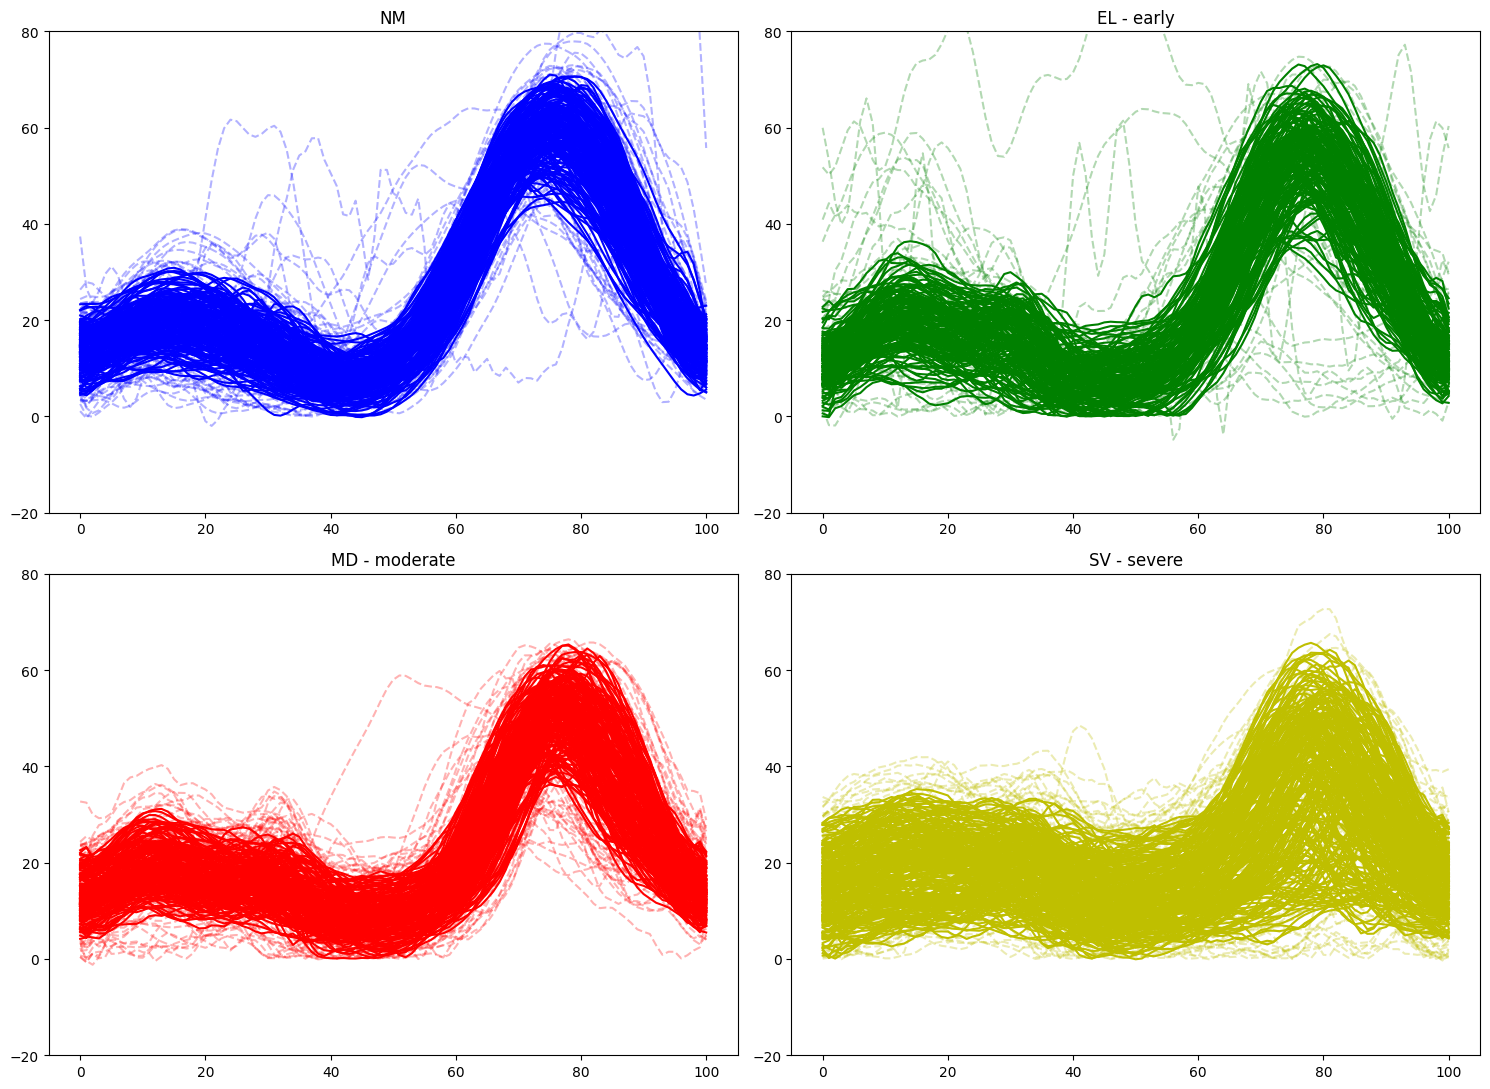

In [12]:
print(selected_data[~selected_data['hasOutlier']]['target_class'].value_counts())

d_joint = 'data_kf' # 'data_k', 'data_h'

fig_list = {'NM':[0, "b"],
            'EL':[1, "g"],
            'MD':[2, "r"],
            'SV':[3, "y"]}
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
ax = ax.flatten()

for _, d in selected_data.iterrows():
    if not d['hasOutlier']:
        i, c = fig_list[d['target_class']]
        ax[i].plot(d[d_joint], c)
    else:
        i, c = fig_list[d['target_class']]
        ax[i].plot(d[d_joint], c+'--', alpha=0.3)


ax[0].set_title('NM')
ax[1].set_title('EL - early')
ax[2].set_title('MD - moderate')
ax[3].set_title('SV - severe')
for i in range(4):
    ax[i].set_ylim([-20, 80])
plt.tight_layout()
plt.show()

In [13]:
selected_data = selected_data[~selected_data['hasOutlier']]
print(selected_data['target_class'].value_counts())
selected_data.shape, selected_data['hasOutlier'].sum()

target_class
SV    222
NM    177
MD    172
EL    154
Name: count, dtype: int64


((725, 10), 0)

In [14]:
check_experiments_value_counts(selected_data)

NM
7 - exist: ['007_NM_01_results']
15 - exist: ['015_NM_01_results']
21 - exist: []
ok count:  27
EL
1 - exist: ['001_KOA_01_EL_results']
ok count:  14
MD
16 - exist: ['016_KOA_02_MD_results']
ok count:  19
SV
ok count:  15


In [15]:
selected_data.head(2)

file target_class   direction leg_side step_no  \
0  016_NM_01_results           NM  left2right        r       0   
1  016_NM_01_results           NM  left2right        r       1   

                                              data_k  \
0  [15.363278965010693, 17.627590032662823, 20.08...   
1  [10.275082716983746, 12.283868431155497, 15.63...   

                                    poses2d_filtered  \
0  [[[327.82599487304685, 529.4435180664062], [32...   
1  [[[966.4197265625, 515.9251647949219], [962.83...   

                                    poses3d_filtered  \
0  [[[0.0, 0.0, 0.0], [-0.006222020834684372, 0.0...   
1  [[[0.0, 0.0, 0.0], [-0.010303234308958053, 0.0...   

                                             data_kf  hasOutlier  
0  [15.363278965010693, 16.45546677924989, 17.127...       False  
1  [10.275082716983754, 9.673763474518484, 10.613...       False

In [87]:
# from sklearn.model_selection import train_test_split

# subj_target_ds = pd.DataFrame(selected_data[['file', 'target_class']].value_counts().index.tolist(), columns=['file', 'target_class'])
# train, test = train_test_split(subj_target_ds, test_size=0.2, stratify=subj_target_ds['target_class'], random_state=42)
# train.shape, test.shape, selected_data['file'].isin(train['file']).sum(), selected_data['file'].isin(test['file']).sum()

# train_df = selected_data[selected_data['file'].isin(train['file'])]
# print(train_df['target_class'].value_counts())

# test_df = selected_data[selected_data['file'].isin(test['file'])]
# print(test_df['target_class'].value_counts())

In [64]:
selected_data['subject_id']=selected_data['file'].apply(lambda x:x.split('_')[0])+selected_data['target_class'].astype(str)

In [65]:
from sklearn.model_selection import train_test_split

train_list = []
test_list = []
for tc in selected_data['target_class'].unique():
    train, test = train_test_split(selected_data[selected_data['target_class']==tc]['subject_id'].value_counts().index.tolist(), 
                                   test_size=0.2, random_state=42)
    train_list.extend(train) 
    test_list.extend(test)

In [66]:
train_df = selected_data[selected_data['subject_id'].isin(train_list)]
print(train_df['target_class'].value_counts())

test_df = selected_data[selected_data['subject_id'].isin(test_list)]
print(test_df['target_class'].value_counts())

target_class
SV    174
NM    143
MD    133
EL    120
Name: count, dtype: int64
target_class
SV    48
MD    39
NM    34
EL    34
Name: count, dtype: int64


In [88]:
# check train - test splits last time
print(train_df.shape, train_df['file'].isin(test_df['file'].value_counts().index.tolist()).any())
print(test_df.shape, test_df['file'].isin(train_df['file'].value_counts().index.tolist()).any())

(570, 11) False
(155, 11) False


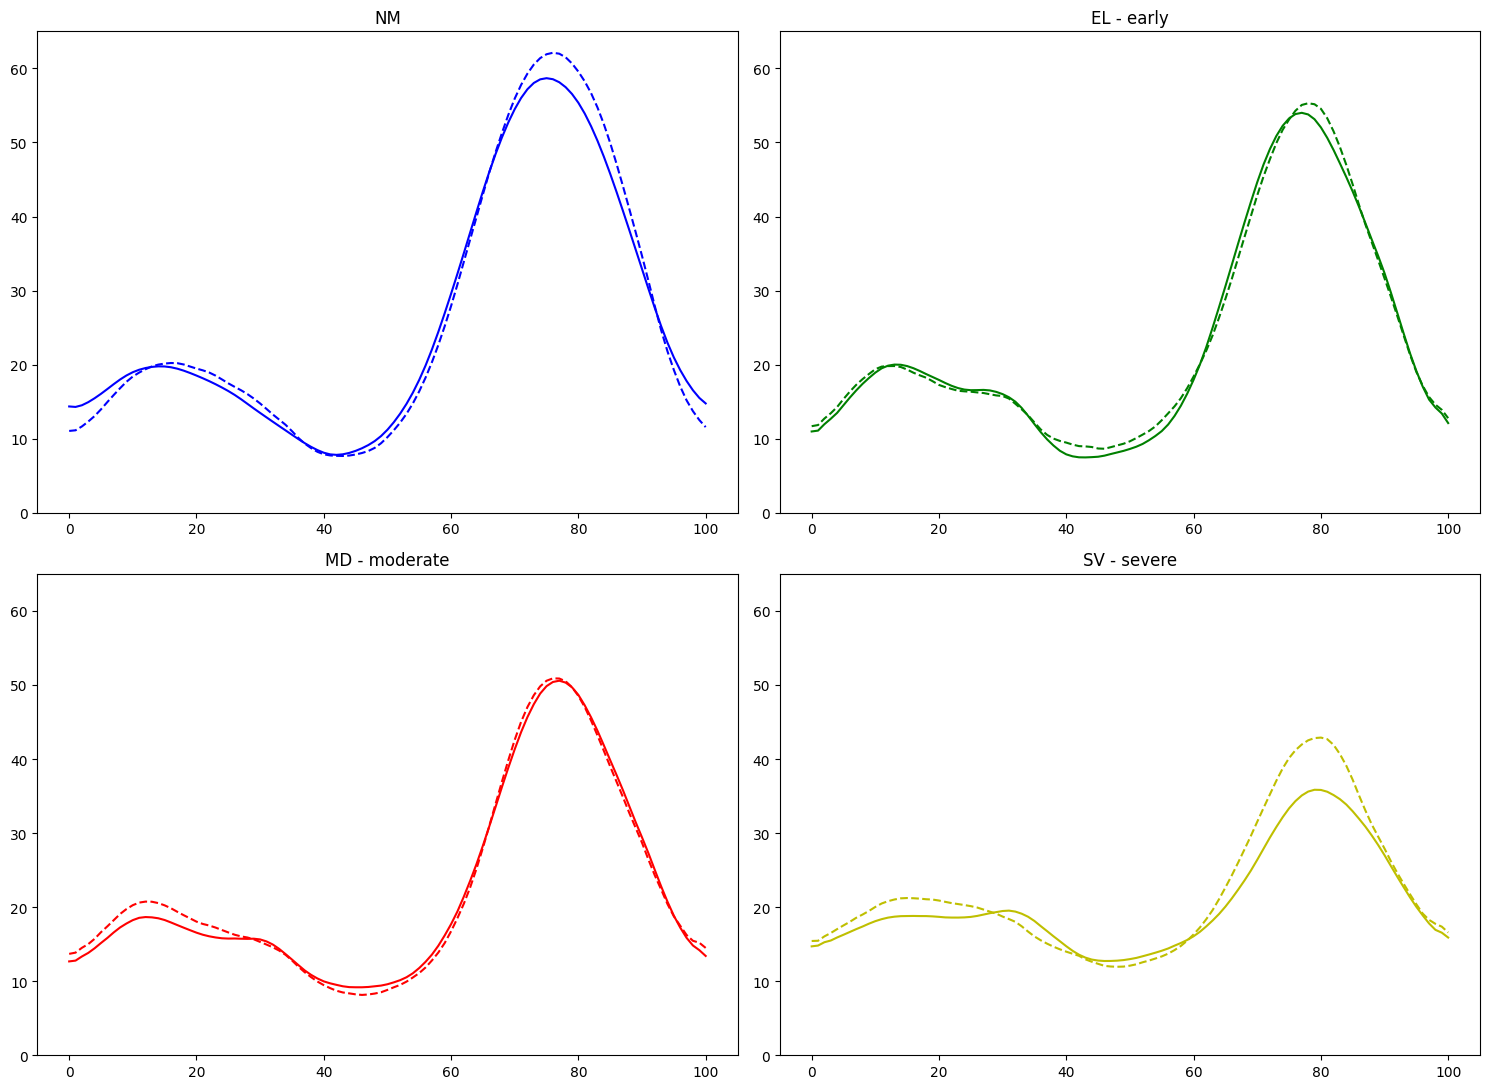

In [68]:
target_class_list = ['NM', 'EL', 'MD', 'SV']
col = 'data_kf'

data_to_plot_train = {}
for tgt_cls in target_class_list:
    p = train_df[(train_df['target_class']==tgt_cls)][col]
    data_in_df = pd.DataFrame([i for i in p.values], index=p.index)
    data_to_plot_train[tgt_cls] = {'data':data_in_df, 'mean':data_in_df.mean(axis=0), 'std':data_in_df.std(axis=0)}

data_to_plot_test = {}
for tgt_cls in target_class_list:
    p = test_df[(test_df['target_class']==tgt_cls)][col]
    data_in_df = pd.DataFrame([i for i in p.values], index=p.index)
    data_to_plot_test[tgt_cls] = {'data':data_in_df, 'mean':data_in_df.mean(axis=0), 'std':data_in_df.std(axis=0)}


fig_list = {'NM':[0, "b"],
            'EL':[1, "g"],
            'MD':[2, "r"],
            'SV':[3, "y"]}
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
ax = ax.flatten()

for k, [i, c] in fig_list.items():
    ax[i].plot(data_to_plot_train[k]['mean'], c)
    ax[i].plot(data_to_plot_test[k]['mean'], c+'--')


ax[0].set_title('NM')
ax[1].set_title('EL - early')
ax[2].set_title('MD - moderate')
ax[3].set_title('SV - severe')
for i in range(4):
    ax[i].set_ylim([0, 65])
plt.tight_layout()
plt.show()

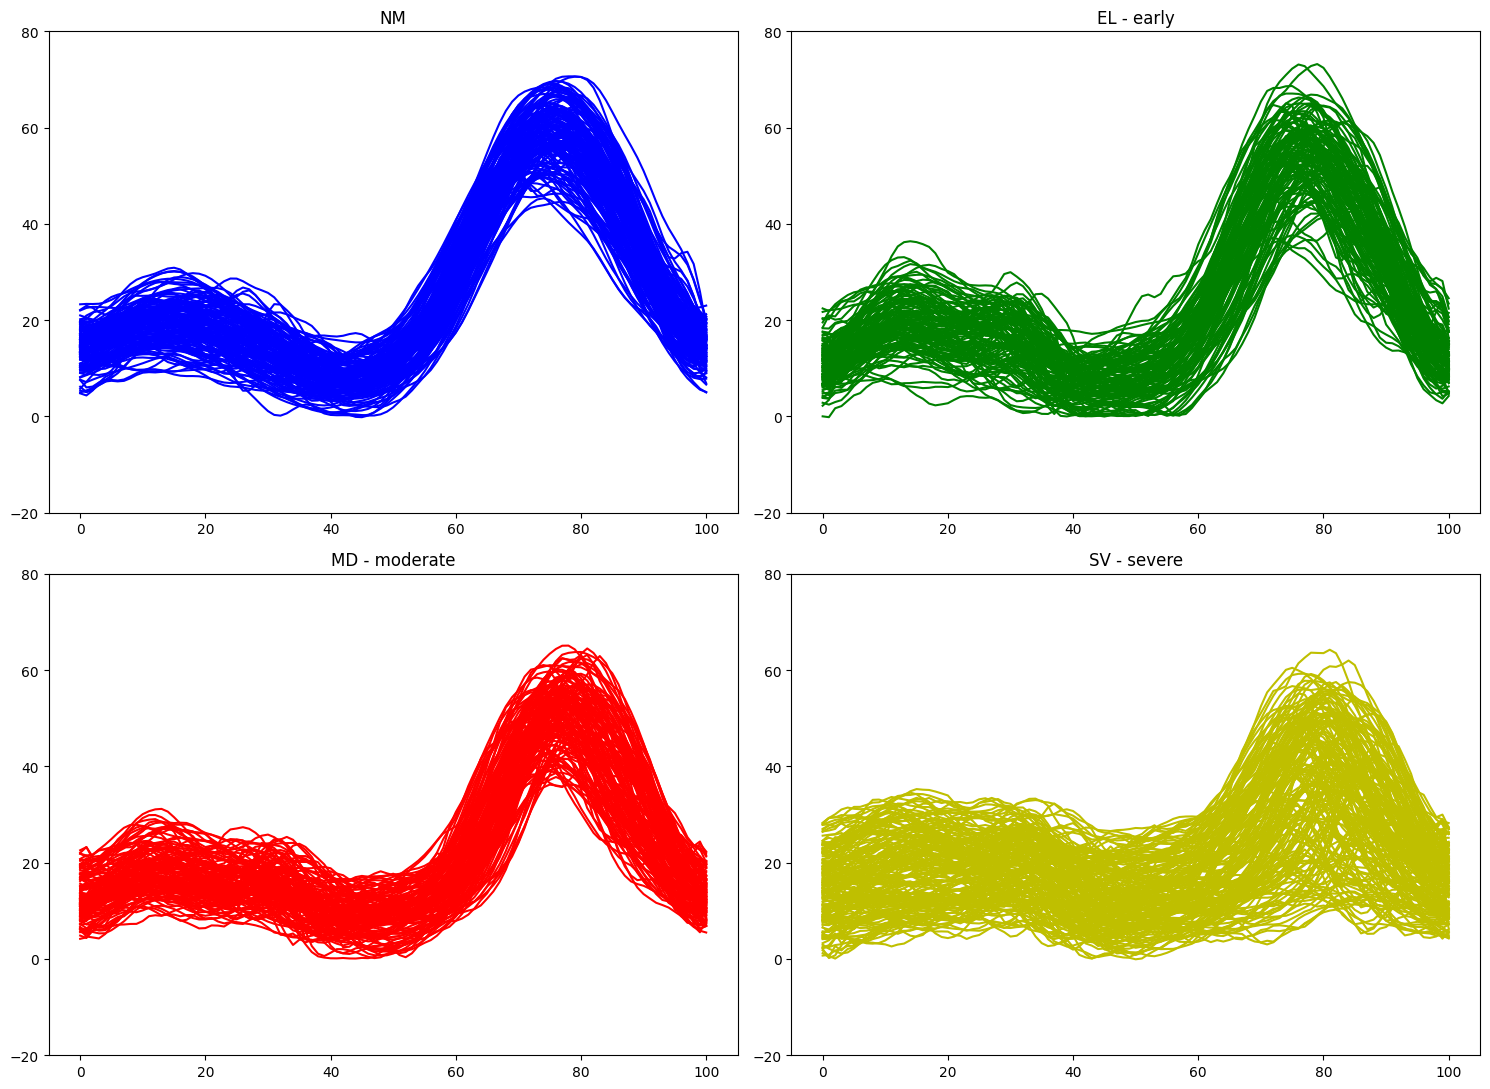

In [69]:
d_joint = 'data_kf' # 'data_k', 'data_h'

fig_list = {'NM':[0, "b"],
            'EL':[1, "g"],
            'MD':[2, "r"],
            'SV':[3, "y"]}
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
ax = ax.flatten()

for _, d in train_df.iterrows():
    if not d['hasOutlier']:
        i, c = fig_list[d['target_class']]
        ax[i].plot(d[d_joint], c)
    else:
        i, c = fig_list[d['target_class']]
        ax[i].plot(d[d_joint], c+'--', alpha=0.3)


ax[0].set_title('NM')
ax[1].set_title('EL - early')
ax[2].set_title('MD - moderate')
ax[3].set_title('SV - severe')
for i in range(4):
    ax[i].set_ylim([-20, 80])
plt.tight_layout()
plt.show()

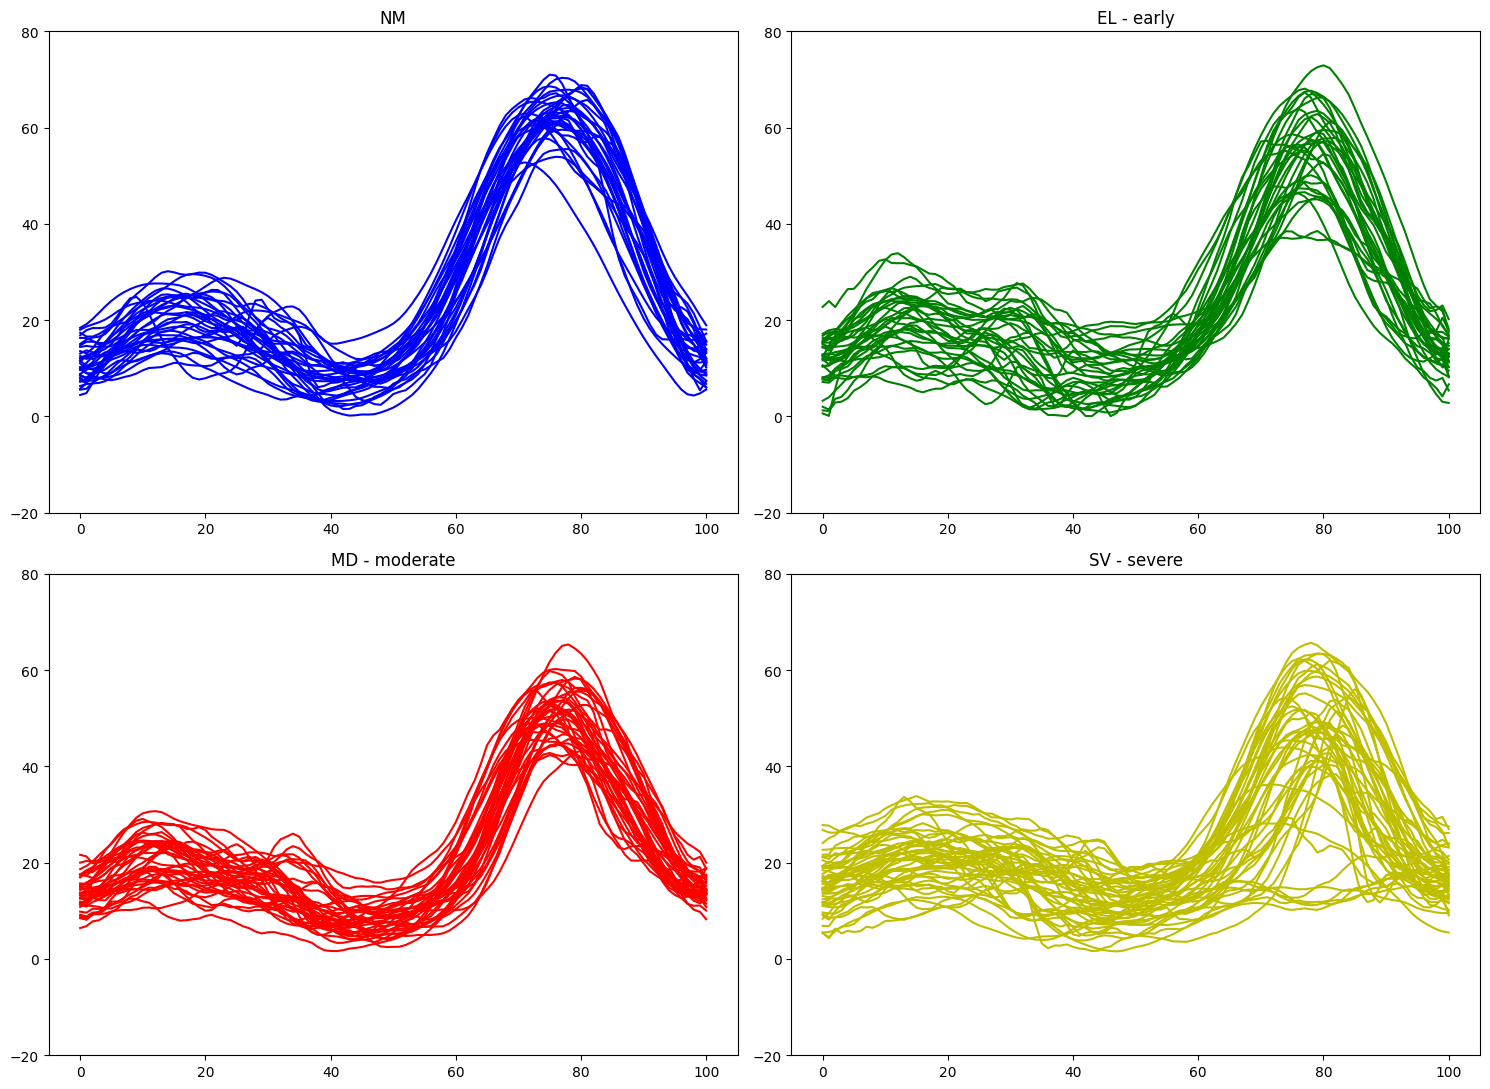

In [ ]:
d_joint = 'data_kf' # 'data_k', 'data_h'

fig_list = {'NM':[0, "b"],
            'EL':[1, "g"],
            'MD':[2, "r"],
            'SV':[3, "y"]}
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
ax = ax.flatten()

for _, d in test_df.iterrows():
    if not d['hasOutlier']:
        i, c = fig_list[d['target_class']]
        ax[i].plot(d[d_joint], c)
    else:
        i, c = fig_list[d['target_class']]
        ax[i].plot(d[d_joint], c+'--', alpha=0.3)


ax[0].set_title('NM')
ax[1].set_title('EL - early')
ax[2].set_title('MD - moderate')
ax[3].set_title('SV - severe')
for i in range(4):
    ax[i].set_ylim([-20, 80])
plt.tight_layout()
plt.show()

In [72]:
test_df[test_df['target_class']=='SV']['file'].value_counts()

file
006_KOA_01_SV_results    13
015_KOA_01_SV_results     8
006_KOA_02_SV_results     8
013_KOA_01_SV_results     7
015_KOA_02_SV_results     6
013_KOA_02_SV_results     6
Name: count, dtype: int64

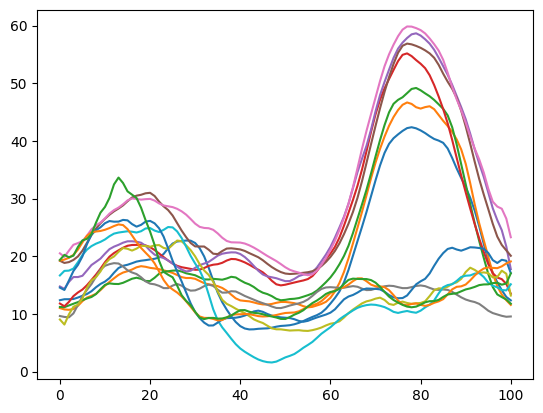

In [84]:
for i in test_df[test_df['file']=='006_KOA_01_SV_results']['data_kf']:
    plt.plot(i)

In [86]:
# import pickle

# # Saving the objects:
# with open('gait_cycle_train_test_dataset.pkl', 'wb') as f:  
#     pickle.dump([train_df, test_df], f)

# Getting back the objects:
# with open('gait_cycle_dataset_knee_hip_all.pkl', 'rb') as f:  
#     gait_cycle_dataset1 = pickle.load(f)
# gait_cycle_dataset1.shape

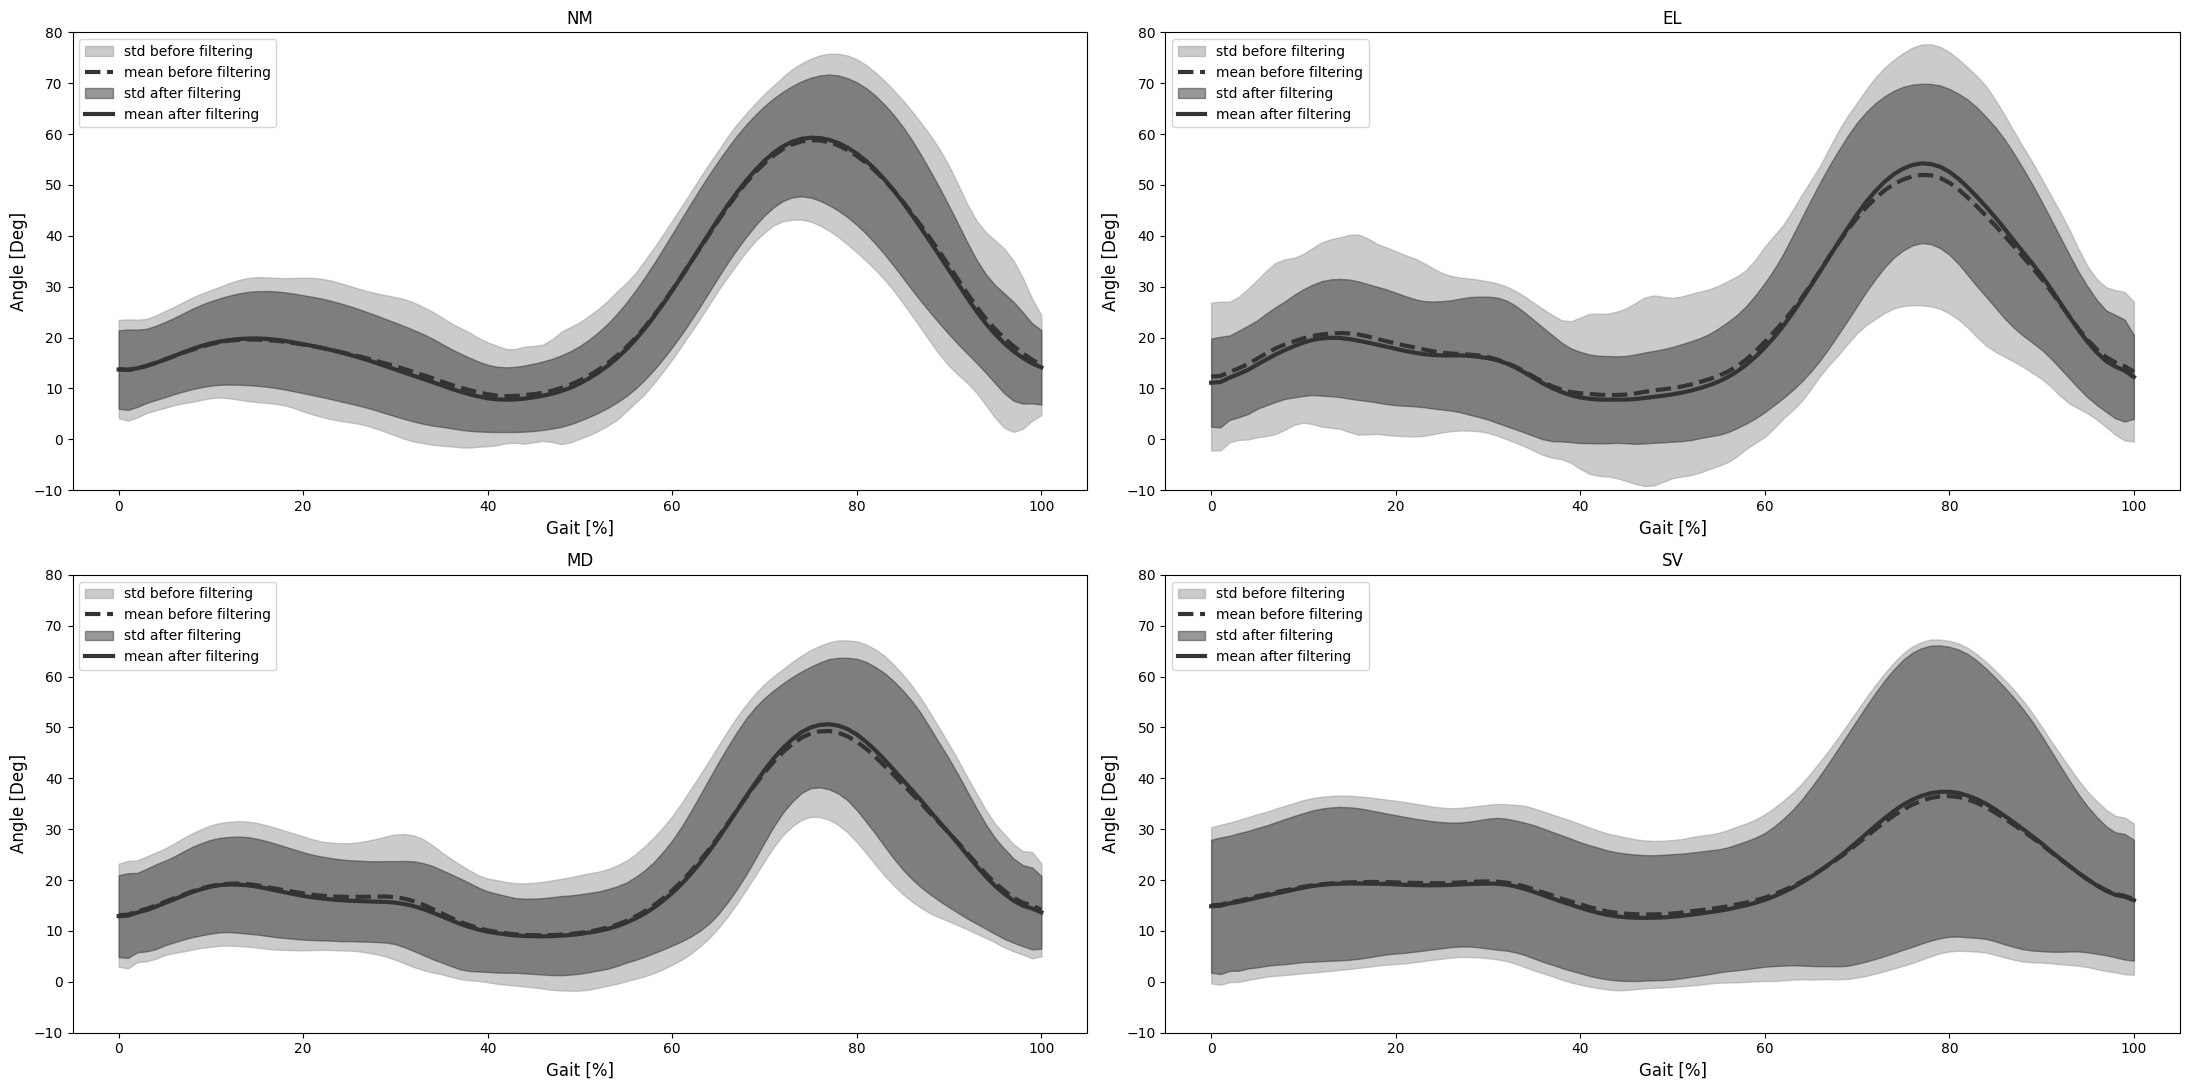

In [74]:
data_to_plot = {}
target_class_list = ['NM', 'EL', 'MD', 'SV']
col = 'data_kf'

for tgt_cls in target_class_list:
  p = gait_cycle_dataset[(gait_cycle_dataset['target_class']==tgt_cls)][col]
  data_in_df = pd.DataFrame([i for i in p.values], index=p.index)
  data_to_plot[tgt_cls] = {'data':data_in_df, 'mean':data_in_df.mean(axis=0), 'std':data_in_df.std(axis=0)}

data_to_plot_clean = {}
for tgt_cls in target_class_list:
  p = selected_data[(selected_data['target_class']==tgt_cls)&
                         (selected_data['hasOutlier']==False)][col]
  data_in_df = pd.DataFrame([i for i in p.values], index=p.index)
  data_to_plot_clean[tgt_cls] = {'data':data_in_df, 'mean':data_in_df.mean(axis=0), 'std':data_in_df.std(axis=0)}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 11))
axes = axes.flatten()
for ax, tgt_cls in zip(axes, target_class_list):
    standard_deviations = 2
    smooth_path = data_to_plot[tgt_cls]['mean']
    path_deviation = data_to_plot[tgt_cls]['std']
    under_line = (smooth_path - standard_deviations * path_deviation)
    over_line = (smooth_path + standard_deviations * path_deviation)

    ax.fill_between(path_deviation.index, under_line, over_line, color=(0.60, 0.60, 0.60), alpha=.5) #std curves.
    p1 = ax.plot(path_deviation.index, smooth_path, color=(0.20, 0.20, 0.20), linestyle='--', linewidth=3, alpha=1) #mean curve.
    # p2 = ax.fill(np.NaN, np.NaN, color=(0.20, 0.20, 0.20), alpha=.9)

    smooth_path = data_to_plot_clean[tgt_cls]['mean']
    path_deviation = data_to_plot_clean[tgt_cls]['std']
    under_line = (smooth_path - standard_deviations * path_deviation)
    over_line = (smooth_path + standard_deviations * path_deviation)
    ax.fill_between(path_deviation.index, under_line, over_line, color=(0.20, 0.20, 0.20), alpha=.5) #std curves.
    p1 = ax.plot(path_deviation.index, smooth_path, color=(0.20, 0.20, 0.20), linestyle='-', linewidth=3, alpha=1) #mean curve.    

    ax.set_ylabel('Angle [Deg]', fontsize=12)
    ax.set_xlabel('Gait [%]', fontsize=12)

    ax.set_ylim([-10, 80])
    ax.set_title(tgt_cls)
    ax.legend(['std before filtering', 'mean before filtering', 
               'std after filtering', 'mean after filtering'], title=False, fontsize=10, loc='upper left')


fig.tight_layout()